In [45]:
# np is the standard name for importing numpy. You should always use it! pd is the standard name for 
# importing pandas, and plt is the standard for matplotlib.pyplot. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# There are a number of different modules that you can use to load an ordinary-least-squares model. 
# Using the OLS model from statsmodels is nice because it gives us the option to look at the 
# coefficients, p-values, AIC, BIC, etc. in a very convenient way.
from statsmodels.api import OLS

In [47]:
# The boston dataset is one of the classic datasets often used for intro analysis. 
from sklearn.datasets import load_boston

In [48]:
# Features are our X's and the target is our Y. 
boston_data = load_boston()
features = boston_data.data
target = boston_data.target

In [49]:
# We can look at our feature/X-variable names as follows...
# This site has full descriptions of the feature names: http://archive.ics.uci.edu/ml/datasets/Housing
feat_names = boston_data.feature_names

In [50]:
# Before we fit our data, we need to add in an intercept. The OLS model from statsmodels.api doesn't 
# automatically fit an intercept and doesn't have the option for us to tell it to (sklearn does). 
# Since features is a numpy array (and not a pandas DataFrame), we'll check it's shape first so we can 
# know how to add our intercept, which will just be a column of ones. 
features.shape

(506, 13)

In [51]:
# From the above we know that we can add a column on the end, at position 14. 
num_rows = features.shape[0]
features = np.c_[features, np.ones(num_rows)]
features.shape

(506, 14)

In [52]:
# The majority, if not all, of regression models follow a very common pattern and have almost identical 
# methods available. Fit and predict are two of our go-tos. 
# http://statsmodels.sourceforge.net/stable/generated/statsmodels.regression.linear_model.OLS.html
np_ols_mod = OLS(target, features).fit()
ols_preds = np_ols_mod.predict()
residuals = target - ols_preds

In [53]:
# We can look at our coefficients with the .summary() method of the output from the .fit() method. 
np_ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 19 Aug 2015   Prob (F-statistic):          6.95e-135
Time:                        14:03:53   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1072      0.033     -3.276      0.001      -0.171      -0.043
x2             0.0464      0.014      3.380      0.001       0.019       0.073
x3             0.0209      0.061      0.339      0.735      -0.100       0.142
x4             2.6886      0.862      3.120      0.002       0.996       4.381
x5           -17.7958      3.821     -4.658      0.000     -25.302     -10.289
x6             3.8048      0.418      9.102      0.000       2.983       4.626
x7             0.0008      0.013      0.057      0.955      -0.025       0.027
x8            -1.4758      0.199     -7.398      0.000      -1.868      -1.084
x9             0.3057      0.066      4.608      0.000       0.175       0.436
x10           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
x11           -0.9535      0.131     -7.287      0.000      -1.211      -0.696
x12            0.0094      0.003      3.500      0.001       0.004       0.015
x13           -0.5255      0.051    -10.366      0.000      -0.625      -0.426
const         36.4911      5.104      7.149      0.000      26.462      46.520
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

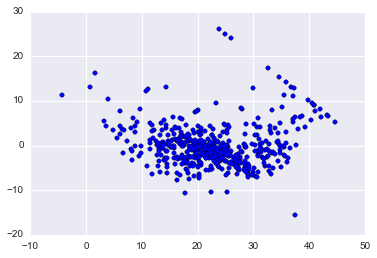

In [54]:
plt.scatter(ols_preds, residuals)
plt.show()

In [55]:
# The pandas way - basically we are just throwing this in a Dataframe and running the regression 
# with our features in a dataframe. The nice thing about this is that instead of getting x1-x13 for 
# the variables above, we get actual variable names. 
feat_names = list(feat_names)
feat_names.append('ones')
features_df = pd.DataFrame(features, columns=feat_names)
feat_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'ones']

In [56]:
# Now we can look at our column names, and then re-run our regression. 
features_df.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT', u'ones'],
      dtype='object')

In [57]:
df_ols_mod = OLS(target, features_df).fit()
df_ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 19 Aug 2015   Prob (F-statistic):          6.95e-135
Time:                        14:03:53   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
ones          36.4911      5.104      7.149      0.000      26.462      46.520
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
# This gives us the exact same results... what a surprise!